# Audio file analysis

This notebook does some very basic analysis of an audio file like
waveform plotting, spectrum display, etc. The content is 
inspired by the video lectures of Valerio Velardo from The Sound of AI.

A 25 second sample of the song "I ran (So Far away)" by "A Flock of Seagulls"
was taken from the song's Wikipedia page, the link of which is given below.

Following operations are performed in this notebook:
* Waveform plotting
* PSD plot
* Spectrogram
* MFCC

In [2]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Audio file source: https://en.wikipedia.org/wiki/File:A_Flock_of_Seagulls-I_Ran_So_Far_Away_sample.ogg
file = "data/A_Flock_of_Seagulls-I_Ran_So_Far_Away_sample.ogg"

## Simple Waveform plotting
### Time vs Amplitude

Sample rate:  22050


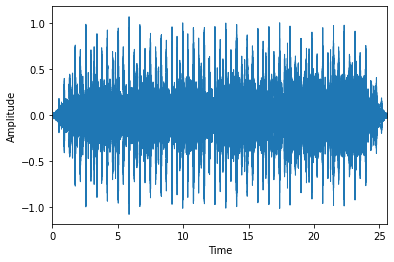

In [3]:
# Simple Waveform plotting
# Sample rate sr is 22050
# Total no. of samples = sr * T = 22050 per sec * 25 sec

signal, sr = librosa.load(file)
print("Sample rate: ", sr)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig("img/plot_wave.png", format="png", dpi=200)
plt.show()

## PSD plot
###  Frequency vs Magnitude

* #### Full plot

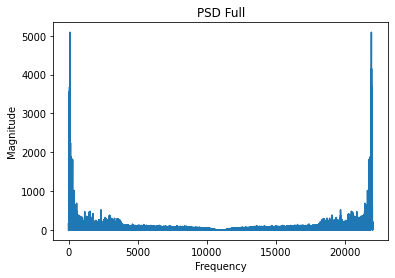

In [4]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("PSD Full")
plt.savefig("img/plot_PSD-Full.png", format="png", dpi=200)

plt.show()

* #### Half plot
<p>
The graph repeats itself (mirrors) after half the frequency,
so we only take the left half of the complete frequency spectrum.
</p>

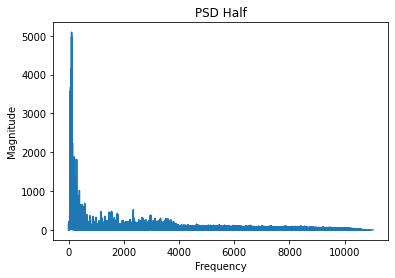

In [5]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("PSD Half")
plt.savefig("img/plot_PSD-Half.png", format="png", dpi=200)

plt.show()

## Spectrogram  
#### Frequency vs Time vs Magnitude

We take the STFT of the signal, with `n_fft` number of points,
and a window length of `hop_length`.
 
* ##### Without dB scale

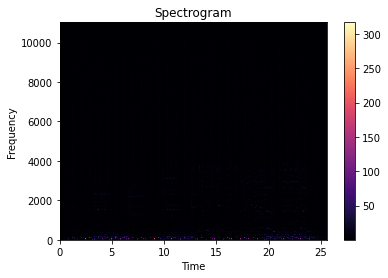

In [6]:
n_fft = 2048        # No. of FFT points
hop_length = 512    # Window length
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.colorbar()
plt.savefig("img/plot_spectrogram.png", format="png", dpi=200)
plt.show()

* ##### With dB scale

c:\users\archi\pycharmprojects\dlforaudiowithpython\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\archi\pycharmprojects\dlforaudiowithpython\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\archi\pycharmprojects\dlforaudiowithpython\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


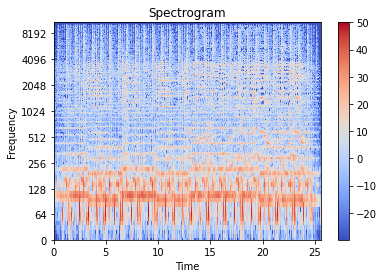

In [7]:
n_fft = 2048        # No. of FFT points
hop_length = 512    # Window length
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.colorbar()
plt.savefig("img/plot_log-spectrogram.png", format="png", dpi=200)
plt.show()

## MFCC

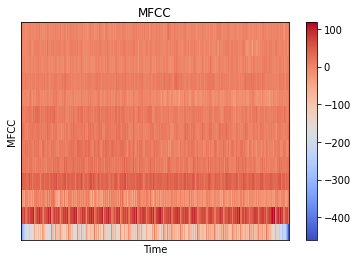

In [8]:
mfcc = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.title("MFCC")
plt.colorbar()
plt.savefig("img/plot_mfcc.png", format="png", dpi=200)
plt.show()

## Mel Spectrogram

A Mel Spectrogram is like a normal spectrogram,
but with mel as its [TODO]

First we get the mel filter banks:

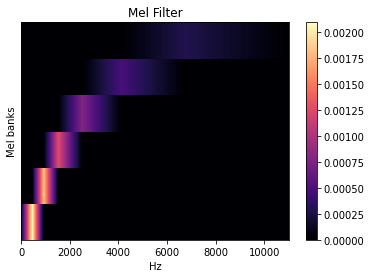

In [9]:
n_mels=6
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear')
plt.title("Mel Filter")
plt.ylabel('Mel banks')
plt.colorbar()
#plt.colorbar(format='%+2.0f dB')
plt.savefig("img/plot_mel.png", format="png", dpi=200)
plt.show()

* The Mel filter banks have a shape of $[n\_mels, \frac{n\_fft}{2} + 1]$.
* There are $n\_mels$ number of bands, each consisting of $\frac{n\_fft}{2} + 1$
(1025 in our case) number of points.
* All the bands can be visualized by plotting a graph for each:  

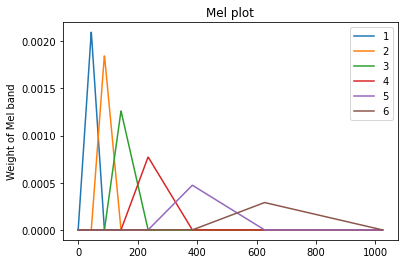

In [10]:
idxs_to_plot = [0, 1, 2, 3, 4, 5]
for i in idxs_to_plot:
    plt.plot(mel[i])
plt.title("Mel plot")
plt.ylabel("Weight of Mel band")
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot])
plt.savefig("img/plot_melplot.png", format="png", dpi=200)
plt.show()

* The bands only cover a specific range of frequency points.
Rest all the points of any band have 0 values.

We finally plot the Mel spectrogram by multiplying the 
Mel filter banks with spectrogram of our signal.

### Mel Spectrogram

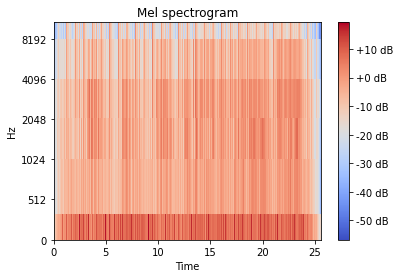

In [58]:
# Using built-in melspectrogram function
mel_spectrogram = librosa.feature.melspectrogram(signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
log_melspectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_melspectrogram, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format='%+2.0f dB')
plt.title("Mel spectrogram")
plt.savefig("img/plot_melspec_auto.png", format="png", dpi=200)
plt.show()

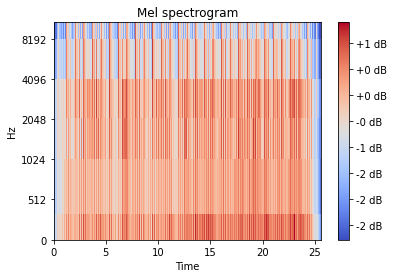

Automatic and manual method match:  True


In [80]:
# Manual method
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)**2
log_spec = librosa.power_to_db(spectrogram)
mat_mul = mel.dot(spectrogram)

# print("Shape of maunal matrix product result:", mat_mul.shape)    
# print("Shape of automatic mel spectogram", mel_spectrogram.shape)

librosa.display.specshow(mel.dot(log_spec), sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format='%+2.0f dB')
plt.title("Mel spectrogram")
plt.savefig("img/plot_melspec_manual.png", format="png", dpi=200)
plt.show()

# Check both automatic and manual matrices' dimensions
# and values to be equal
print("Automatic and manual method match: ", np.allclose(mat_mul, mel_spectrogram))